In [1]:
%pip install pandas torch tqdm matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch.nn as nn
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("../classification_breast_cancer_data.csv")

X = df.drop(columns=["Survival More Than 6 Years"]).values
y = df["Survival More Than 6 Years"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [5]:
class SLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SLP, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        return self.linear(x)

In [6]:
def train(model, train_loader, criterion, optimizer, epochs=50):
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    for epoch in range(epochs):
        model.train()
        train_acc = 0
        train_loss = 0

        for X_batch, y_batch in tqdm(
            train_loader, desc=f"Epoch {epoch + 1}/{epochs} - Training"
        ):
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            train_acc += (predicted == y_batch).sum().item()

        avg_train_loss = train_loss / len(train_dataset)
        avg_train_acc = train_acc / len(train_dataset)

        train_losses.append(avg_train_loss)
        train_accuracies.append(avg_train_acc)

        model.eval()
        val_acc = 0
        val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in tqdm(
                test_loader, desc=f"Epoch {epoch + 1}/{epochs} - Validation"
            ):
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                val_acc += (predicted == y_batch).sum().item()

        avg_val_loss = val_loss / len(test_dataset)
        avg_val_acc = val_acc / len(test_dataset)
        val_losses.append(avg_val_loss)
        val_accuracies.append(avg_val_acc)

        print(
            f"Epoch {epoch + 1}/{epochs} - "
            f"Train Loss: {avg_train_loss:.4f}, Train Acc: {avg_train_acc:.4f}, "
            f"Val Loss: {avg_val_loss:.4f}, Val Acc: {avg_val_acc:.4f}"
        )

    return train_losses, train_accuracies, val_losses, val_accuracies

In [7]:
model = SLP(input_dim=X_train_tensor.shape[1], output_dim=2)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
epochs = 50

train_losses, train_accuracies, val_losses, val_accuracies = train(
    model, train_loader, criterion, optimizer, epochs=epochs
)

Epoch 1/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5529.45it/s]


Epoch 1/50 - Train Loss: 0.0245, Train Acc: 0.5172, Val Loss: 0.0248, Val Acc: 0.5329


Epoch 2/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5248.18it/s]


Epoch 2/50 - Train Loss: 0.0241, Train Acc: 0.5169, Val Loss: 0.0245, Val Acc: 0.5329


Epoch 3/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4992.30it/s]


Epoch 3/50 - Train Loss: 0.0239, Train Acc: 0.5157, Val Loss: 0.0243, Val Acc: 0.5304


Epoch 4/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5042.40it/s]


Epoch 4/50 - Train Loss: 0.0236, Train Acc: 0.5154, Val Loss: 0.0240, Val Acc: 0.5267


Epoch 5/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4514.67it/s]


Epoch 5/50 - Train Loss: 0.0234, Train Acc: 0.5148, Val Loss: 0.0238, Val Acc: 0.5304


Epoch 6/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4947.68it/s]


Epoch 6/50 - Train Loss: 0.0232, Train Acc: 0.5157, Val Loss: 0.0236, Val Acc: 0.5292


Epoch 7/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4681.34it/s]


Epoch 7/50 - Train Loss: 0.0230, Train Acc: 0.5144, Val Loss: 0.0235, Val Acc: 0.5255


Epoch 8/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4872.52it/s]


Epoch 8/50 - Train Loss: 0.0228, Train Acc: 0.5138, Val Loss: 0.0233, Val Acc: 0.5280


Epoch 9/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4664.52it/s]


Epoch 9/50 - Train Loss: 0.0227, Train Acc: 0.5138, Val Loss: 0.0232, Val Acc: 0.5255


Epoch 10/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5181.60it/s]


Epoch 10/50 - Train Loss: 0.0226, Train Acc: 0.5129, Val Loss: 0.0231, Val Acc: 0.5280


Epoch 11/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4621.24it/s]


Epoch 11/50 - Train Loss: 0.0225, Train Acc: 0.5151, Val Loss: 0.0230, Val Acc: 0.5292


Epoch 12/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5102.08it/s]


Epoch 12/50 - Train Loss: 0.0224, Train Acc: 0.5151, Val Loss: 0.0229, Val Acc: 0.5292


Epoch 13/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5305.37it/s]


Epoch 13/50 - Train Loss: 0.0223, Train Acc: 0.5135, Val Loss: 0.0228, Val Acc: 0.5267


Epoch 14/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5117.41it/s]


Epoch 14/50 - Train Loss: 0.0222, Train Acc: 0.5151, Val Loss: 0.0227, Val Acc: 0.5255


Epoch 15/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5168.83it/s]


Epoch 15/50 - Train Loss: 0.0222, Train Acc: 0.5148, Val Loss: 0.0227, Val Acc: 0.5255


Epoch 16/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5248.43it/s]


Epoch 16/50 - Train Loss: 0.0221, Train Acc: 0.5151, Val Loss: 0.0226, Val Acc: 0.5354


Epoch 17/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5209.32it/s]


Epoch 17/50 - Train Loss: 0.0221, Train Acc: 0.5176, Val Loss: 0.0226, Val Acc: 0.5342


Epoch 18/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5090.89it/s]


Epoch 18/50 - Train Loss: 0.0220, Train Acc: 0.5176, Val Loss: 0.0225, Val Acc: 0.5329


Epoch 19/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5161.00it/s]


Epoch 19/50 - Train Loss: 0.0220, Train Acc: 0.5172, Val Loss: 0.0225, Val Acc: 0.5317


Epoch 20/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5280.20it/s]


Epoch 20/50 - Train Loss: 0.0220, Train Acc: 0.5197, Val Loss: 0.0225, Val Acc: 0.5329


Epoch 21/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5161.00it/s]


Epoch 21/50 - Train Loss: 0.0219, Train Acc: 0.5207, Val Loss: 0.0224, Val Acc: 0.5342


Epoch 22/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5560.75it/s]


Epoch 22/50 - Train Loss: 0.0219, Train Acc: 0.5197, Val Loss: 0.0224, Val Acc: 0.5366


Epoch 23/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5407.98it/s]


Epoch 23/50 - Train Loss: 0.0219, Train Acc: 0.5228, Val Loss: 0.0224, Val Acc: 0.5329


Epoch 24/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5350.93it/s]


Epoch 24/50 - Train Loss: 0.0219, Train Acc: 0.5228, Val Loss: 0.0224, Val Acc: 0.5292


Epoch 25/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5203.35it/s]


Epoch 25/50 - Train Loss: 0.0218, Train Acc: 0.5250, Val Loss: 0.0224, Val Acc: 0.5267


Epoch 26/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5052.68it/s]


Epoch 26/50 - Train Loss: 0.0218, Train Acc: 0.5241, Val Loss: 0.0223, Val Acc: 0.5292


Epoch 27/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4997.34it/s]


Epoch 27/50 - Train Loss: 0.0218, Train Acc: 0.5247, Val Loss: 0.0223, Val Acc: 0.5292


Epoch 28/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4805.11it/s]


Epoch 28/50 - Train Loss: 0.0218, Train Acc: 0.5256, Val Loss: 0.0223, Val Acc: 0.5292


Epoch 29/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4921.78it/s]


Epoch 29/50 - Train Loss: 0.0218, Train Acc: 0.5284, Val Loss: 0.0223, Val Acc: 0.5304


Epoch 30/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4729.67it/s]


Epoch 30/50 - Train Loss: 0.0218, Train Acc: 0.5309, Val Loss: 0.0223, Val Acc: 0.5317


Epoch 31/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5406.64it/s]


Epoch 31/50 - Train Loss: 0.0218, Train Acc: 0.5315, Val Loss: 0.0223, Val Acc: 0.5342


Epoch 32/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5224.04it/s]


Epoch 32/50 - Train Loss: 0.0218, Train Acc: 0.5318, Val Loss: 0.0223, Val Acc: 0.5366


Epoch 33/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5334.44it/s]


Epoch 33/50 - Train Loss: 0.0217, Train Acc: 0.5309, Val Loss: 0.0223, Val Acc: 0.5391


Epoch 34/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5296.35it/s]


Epoch 34/50 - Train Loss: 0.0217, Train Acc: 0.5309, Val Loss: 0.0223, Val Acc: 0.5441


Epoch 35/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5196.91it/s]


Epoch 35/50 - Train Loss: 0.0217, Train Acc: 0.5284, Val Loss: 0.0223, Val Acc: 0.5453


Epoch 36/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5233.57it/s]


Epoch 36/50 - Train Loss: 0.0217, Train Acc: 0.5266, Val Loss: 0.0222, Val Acc: 0.5453


Epoch 37/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4913.80it/s]


Epoch 37/50 - Train Loss: 0.0217, Train Acc: 0.5266, Val Loss: 0.0222, Val Acc: 0.5466


Epoch 38/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4994.13it/s]


Epoch 38/50 - Train Loss: 0.0217, Train Acc: 0.5294, Val Loss: 0.0222, Val Acc: 0.5478


Epoch 39/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5098.03it/s]


Epoch 39/50 - Train Loss: 0.0217, Train Acc: 0.5300, Val Loss: 0.0222, Val Acc: 0.5478


Epoch 40/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5340.18it/s]


Epoch 40/50 - Train Loss: 0.0217, Train Acc: 0.5312, Val Loss: 0.0222, Val Acc: 0.5528


Epoch 41/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5488.82it/s]


Epoch 41/50 - Train Loss: 0.0217, Train Acc: 0.5322, Val Loss: 0.0222, Val Acc: 0.5565


Epoch 42/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5466.81it/s]


Epoch 42/50 - Train Loss: 0.0217, Train Acc: 0.5328, Val Loss: 0.0222, Val Acc: 0.5565


Epoch 43/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5250.20it/s]


Epoch 43/50 - Train Loss: 0.0217, Train Acc: 0.5331, Val Loss: 0.0222, Val Acc: 0.5553


Epoch 44/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4774.39it/s]


Epoch 44/50 - Train Loss: 0.0217, Train Acc: 0.5322, Val Loss: 0.0222, Val Acc: 0.5553


Epoch 45/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4848.91it/s]


Epoch 45/50 - Train Loss: 0.0217, Train Acc: 0.5318, Val Loss: 0.0222, Val Acc: 0.5578


Epoch 46/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5091.84it/s]


Epoch 46/50 - Train Loss: 0.0217, Train Acc: 0.5331, Val Loss: 0.0222, Val Acc: 0.5553


Epoch 47/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4916.01it/s]


Epoch 47/50 - Train Loss: 0.0217, Train Acc: 0.5328, Val Loss: 0.0222, Val Acc: 0.5590


Epoch 48/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5109.25it/s]


Epoch 48/50 - Train Loss: 0.0217, Train Acc: 0.5359, Val Loss: 0.0222, Val Acc: 0.5590


Epoch 49/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4891.76it/s]


Epoch 49/50 - Train Loss: 0.0217, Train Acc: 0.5343, Val Loss: 0.0222, Val Acc: 0.5590


Epoch 50/50 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4827.23it/s]

Epoch 50/50 - Train Loss: 0.0217, Train Acc: 0.5346, Val Loss: 0.0222, Val Acc: 0.5615


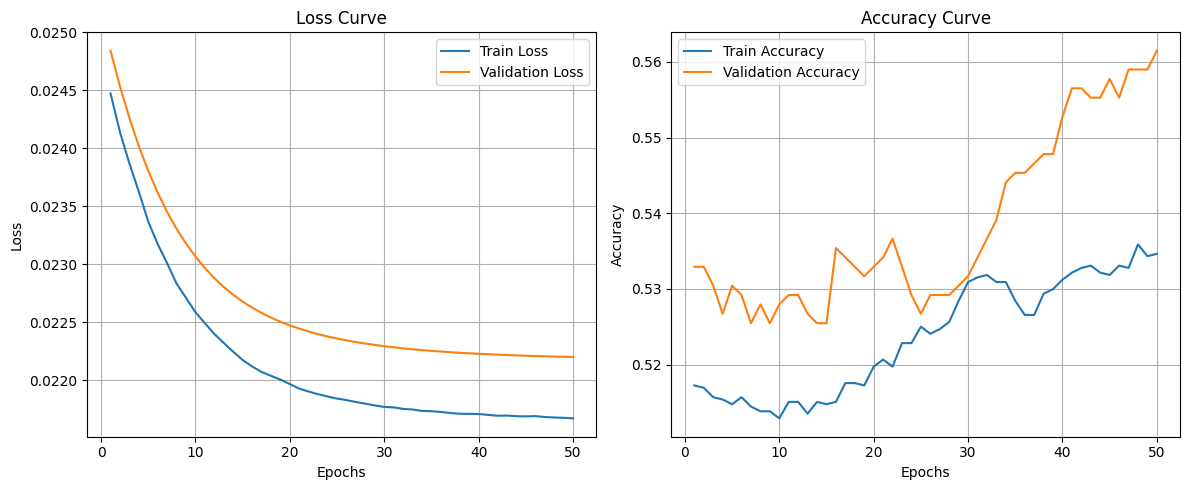

In [8]:
epochs_range = list(range(1, epochs + 1))

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot Loss
axs[0].plot(epochs_range, train_losses, label="Train Loss")
axs[0].plot(epochs_range, val_losses, label="Validation Loss")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
axs[0].set_title("Loss Curve")
axs[0].legend()
axs[0].grid(True)

# Plot Accuracy
axs[1].plot(epochs_range, train_accuracies, label="Train Accuracy")
axs[1].plot(epochs_range, val_accuracies, label="Validation Accuracy")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")
axs[1].set_title("Accuracy Curve")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()
